# __Here in this notebook we have done a study of the various ML algorithms namely Linear Regression, Logistic Regression, Support Vector Machines, Decision Trees and Random Forest. We have also done data preprocessing on some data__

# __1.  Data Preprocessing__


### __1. Assign a type to each of the following features (a) Model, (b) Type, (c) Max. Price and (d) Airbags from the following: ordinal/nominal/ratio/interval scale.__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
cars_dataset = pd.read_csv("Cars93.csv")

In [4]:
cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [5]:
cars_dataset[['Model', 'Type', 'Max.Price', 'AirBags']].head(5)

,Model,Type,Max.Price,AirBags
0,Integra,Small,18.8,NaN
1,Legend,Midsize,38.7,Driver & Passenger
2,90,Compact,32.3,Driver only
3,100,Midsize,44.6,Driver & Passenger
4,535i,Midsize,36.2,Driver only


In [6]:
cars_dataset['Model'].value_counts()

Model
Integra    1
Legend     1
90         1
100        1
535i       1
          ..
Eurovan    1
Passat     1
Corrado    1
240        1
850        1
Name: count, Length: 93, dtype: int64

In [7]:
cars_dataset['Type'].value_counts()

Type
Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: count, dtype: int64

In [8]:
cars_dataset['Max.Price'].value_counts()

Max.Price
21.7    3
18.4    3
21.2    3
22.7    3
10.0    2
       ..
26.6    1
22.4    1
23.7    1
23.5    1
28.5    1
Name: count, Length: 79, dtype: int64

In [9]:
cars_dataset['AirBags'].value_counts()

AirBags
Driver only           43
Driver & Passenger    16
Name: count, dtype: int64

### So after doing some exploratory analysis, We observe:
#### a. Model represents the names of different car models like 'Integra', 'Legend' and so on. So there is no specific relation between
#### the different labels. Also they are just labels with specific order. Hence by defination, this should be classified as __Nomimal__

#### b. Type represents different sizes of vehicles. So we can somewhat derive a relationship between them in the sense Small < Sporty < Compact < Midsize < Large < Van. So by defination, Ordinal fits best in this case.

#### c. Max.Prcie represent numerical values. So now we can rule out nominal and ordinal. Also we can rule out Ratio as it requires a __true zero__ point but it doesnot make sense when we talk of 0 Max Price for cars so we can rule out Ratio. Hence Interval fits the best.


#### d. AirBags repsents two levels of safety like 'Driver only' & 'Driver & Passenger' so there is a relationship between them in terms of safety like
#### 'Driver only' < 'Driver & Passenger'. So Ordinal fits best.

### __2. Write a function to handle the missing values in the dataset (e.g., any NA, NaN values).__

In [10]:
cars_dataset.head(5)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [11]:
na_nan_values_by_column = cars_dataset.isna().sum()

na_nan_values_by_column[na_nan_values_by_column > 0]

AirBags           34
Rear.seat.room     2
Luggage.room      11
dtype: int64

<Axes: >

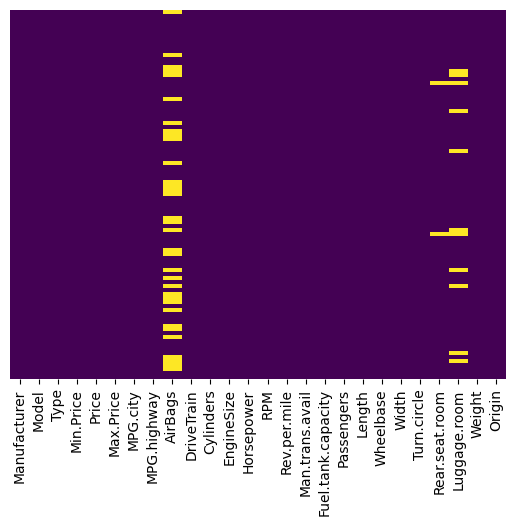

In [12]:
sns.heatmap(cars_dataset.isna(), yticklabels=False, cbar=False, cmap='viridis')

#### From the above data we can see that only AirBags, Rear.seat.room  and Luggage.room has NA or NAN values. So we need to apply imputation to them

In [13]:
def handle_NAN_values(cols):
    for col in cars_dataset[cols]:
        median_values = cars_dataset[col].median()
        cars_dataset[col].fillna(median_values, inplace=True)


handle_NAN_values(['Luggage.room', 'Rear.seat.room'])

na_nan_values_by_column = cars_dataset.isna().sum()

na_nan_values_by_column[na_nan_values_by_column > 0]

C:\Users\Raj\AppData\Local\Temp\ipykernel_14460\1852320543.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_dataset[col].fillna(median_values, inplace=True)
C:\Users\Raj\AppData\Local\Temp\ipykernel_14460\1852320543.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

AirBags    34
dtype: int64

#### We have replaced NAN values for the Luggage.room and Rear.seat.room using a common function since they are numerical values
#### but for the AirBags column which contains categorical value, we have to use a different approach. We could have used Encoder and then used median on them but since the question does not require that so we can use the relationship between Airbags and Price to fill the empty spaces and update the NAN with them.

In [14]:
# def handle_NAN_values_with_custom_value(df,col,value):
#   df[col].fillna(value,inplace=True)

In [15]:
cars_dataset['AirBags'].fillna('None',inplace=True)
cars_dataset['AirBags']
cars_dataset.groupby('AirBags')['Price'].mean()

C:\Users\Raj\AppData\Local\Temp\ipykernel_14460\1880944775.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_dataset['AirBags'].fillna('None',inplace=True)


AirBags
Driver & Passenger    28.368750
Driver only           21.223256
None                  13.173529
Name: Price, dtype: float64

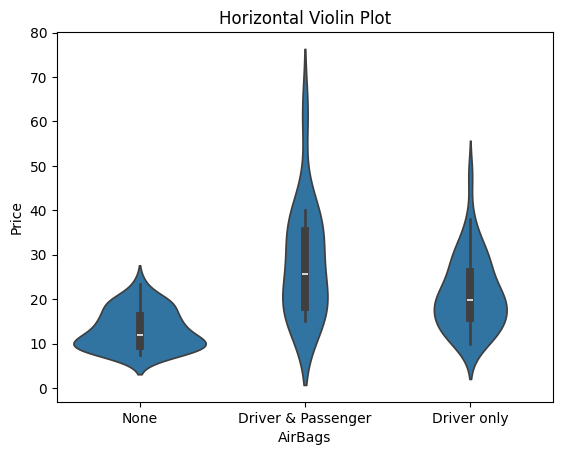

In [16]:
sns.violinplot(x='AirBags', y='Price', data=cars_dataset)
plt.title('Horizontal Violin Plot')
plt.show()

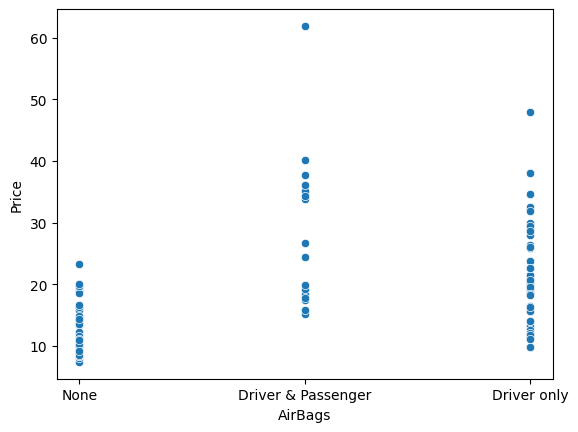

In [17]:
sns.scatterplot(x="AirBags",y="Price",data=cars_dataset)
plt.show()

In [18]:
na_nan_values_by_column = cars_dataset.isna().sum()

na_nan_values_by_column[na_nan_values_by_column > 0]

Series([], dtype: int64)

<Axes: >

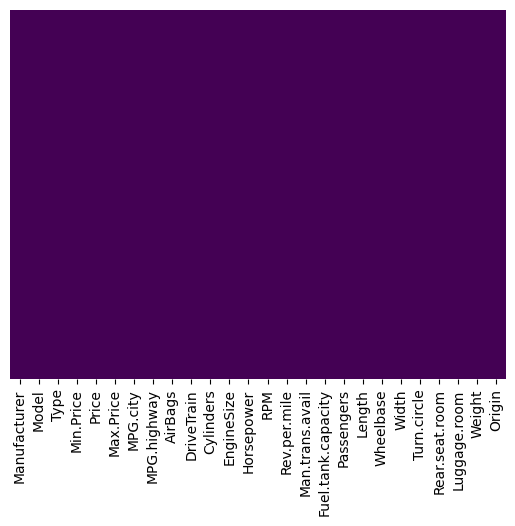

In [19]:
sns.heatmap(cars_dataset.isna(), yticklabels=False, cbar=False, cmap='viridis')

### __3. Write a function to reduce noise (any error in the feature) in individual attributes.__

In [20]:
def replace_outliers_zscore(cars_dataset, columns, threshold=2):
    for col in columns:
        mean = cars_dataset[col].mean()
        std_dev = cars_dataset[col].std()

        # Compute mean of non-outliers
        non_outliers = cars_dataset[np.abs((cars_dataset[col] - mean) / std_dev) < threshold][col]
        median_value = non_outliers.median()

        # Replace outliers with median
        cars_dataset[col] = cars_dataset[col].apply(lambda x: median_value if np.abs((x - mean) / std_dev) >= threshold else x)

numeric_columns = cars_dataset.select_dtypes(include=['number']).columns.tolist()
replace_outliers_zscore(cars_dataset, numeric_columns )

cars_dataset

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.80,25.0,31.0,None,Front,...,13.2,5.0,177.0,102.0,68.0,37.0,26.5,11.0,2705.0,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.70,18.0,25.0,Driver & Passenger,Front,...,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA
2,Audi,90,Compact,25.9,29.1,32.30,20.0,26.0,Driver only,Front,...,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA
3,Audi,100,Midsize,30.8,37.7,19.15,19.0,26.0,Driver & Passenger,Front,...,21.1,6.0,193.0,106.0,70.0,37.0,31.0,17.0,3405.0,non-USA
4,BMW,535i,Midsize,23.7,30.0,36.20,22.0,30.0,Driver only,Rear,...,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.70,17.0,21.0,None,Front,...,21.1,7.0,187.0,115.0,72.0,38.0,27.5,14.0,3960.0,non-USA
89,Volkswagen,Passat,Compact,17.6,20.0,22.40,21.0,30.0,None,Front,...,18.5,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.70,18.0,25.0,None,Front,...,18.5,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA
91,Volvo,240,Compact,21.8,22.7,23.50,21.0,28.0,Driver only,Rear,...,15.8,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA


In [21]:
cars_dataset.groupby('Origin')['Price'].mean()




Origin
USA        18.092708
non-USA    18.826667
Name: Price, dtype: float64

In [22]:
cars_dataset['Model'].nunique()
# cars_dataset.drop(["Model"],inplace=True,axis=1)


93

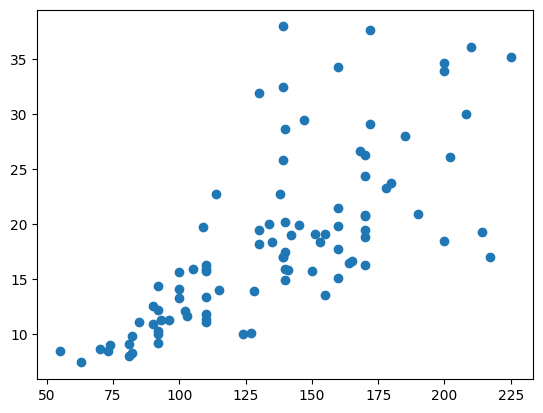

In [23]:
plt.scatter(cars_dataset["Horsepower"],cars_dataset["Price"])

#sns.scatterplot(x="Type",y="Price",data=cars_dataset)
plt.show()

In [24]:
cars_dataset['price_diff'] = cars_dataset['Price'] - (cars_dataset['Max.Price'] + cars_dataset['Min.Price'])/2
cars_dataset['price_diff'].astype(int).unique()

# plt.plot(cars_dataset['Avg_price'],cars_dataset['Price'])
# plt.show()

array([  0,  12, -11,  10])

#### As you can see Horsepower and EngineSize both are highly correlative we can drop one of them

In [25]:
cars_dataset['Horsepower'].corr(cars_dataset['EngineSize'])

np.float64(0.7275737598017891)

In [26]:
cars_dataset.drop(["EngineSize"],inplace=True,axis=1)
cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     float64
 7   MPG.highway         93 non-null     float64
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  Horsepower          93 non-null     float64
 12  RPM                 93 non-null     float64
 13  Rev.per.mile        93 non-null     float64
 14  Man.trans.avail     93 non-null     object 
 15  Fuel.tank.capacity  93 non-null     float64
 16  Passengers

### __4. Write a function to encode all the categorical features in the dataset according to the type of variable jointly.__

In [27]:
cars_dataset.head(5)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,price_diff
0,Acura,Integra,Small,12.9,15.9,18.80,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,11.0,2705.0,non-USA,5.000000e-02
1,Acura,Legend,Midsize,29.2,33.9,38.70,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,-5.000000e-02
2,Audi,90,Compact,25.9,29.1,32.30,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,3.552714e-15
3,Audi,100,Midsize,30.8,37.7,19.15,19.0,26.0,Driver & Passenger,Front,...,6.0,193.0,106.0,70.0,37.0,31.0,17.0,3405.0,non-USA,1.272500e+01
4,BMW,535i,Midsize,23.7,30.0,36.20,22.0,30.0,Driver only,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,5.000000e-02


In [28]:
object_cols = []
for col in cars_dataset.columns:
    if cars_dataset[col].dtype == object:
        object_cols.append(col)

cars_dataset[object_cols].head(5)


,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin
0,Acura,Integra,Small,None,Front,4,Yes,non-USA
1,Acura,Legend,Midsize,Driver & Passenger,Front,6,Yes,non-USA
2,Audi,90,Compact,Driver only,Front,6,Yes,non-USA
3,Audi,100,Midsize,Driver & Passenger,Front,6,Yes,non-USA
4,BMW,535i,Midsize,Driver only,Rear,4,Yes,non-USA


#### So here we shall be using LabelEncoder for 'Manufacturer', 'Model', 'DriveTrain' because the data has no ordering or ranking hence are nominal and OrdinalEncoder for 'Type', 'AirBags','Cylinders', 'Man.trans.avail', and 'Origin' because they contain meaningful order or ranking.

#### For safe operations, we make a copy of the data set and then apply the encoding to them.

In [29]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

####__Function to Encode categorical Value__

In [30]:

label_encoder_cols = ['Manufacturer', 'Model', 'DriveTrain']
ordinal_encoder_cols = ['Type', 'AirBags', 'Cylinders', 'Man.trans.avail', 'Origin']

def encode_categorical(df, columns, encoding_type='label'):
    # Ordinal Encoding
    if encoding_type == 'ordinal':
      ordinal = OrdinalEncoder()
      df[columns] = ordinal.fit_transform(df[columns])
    # Label Encoding
    elif encoding_type == 'label':
        label = LabelEncoder()
        for column in columns:
            df[column] = label.fit_transform(df[column])
    elif encoding_type == 'onehot':
        for column in columns:
          dummies = pd.get_dummies(df[column], drop_first=True,dtype=int)
          df = pd.concat([df,dummies],axis=1)
    return df

cars_dataset_copy = cars_dataset.copy()
cars_ordinal_encoded = encode_categorical(cars_dataset_copy, ordinal_encoder_cols, encoding_type='ordinal')
cars_label_encoded = encode_categorical(cars_dataset_copy, label_encoder_cols, encoding_type='label')

cars_combined_encoded = pd.concat([cars_ordinal_encoded, cars_label_encoded], axis=1)
cars_combined_encoded.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,price_diff
0,0,48,3.0,12.9,15.9,18.80,25.0,31.0,2.0,1,...,5.0,177.0,102.0,68.0,37.0,26.5,11.0,2705.0,1.0,5.000000e-02
1,0,55,2.0,29.2,33.9,38.70,18.0,25.0,0.0,1,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,1.0,-5.000000e-02
2,1,8,0.0,25.9,29.1,32.30,20.0,26.0,1.0,1,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,1.0,3.552714e-15
3,1,0,2.0,30.8,37.7,19.15,19.0,26.0,0.0,1,...,6.0,193.0,106.0,70.0,37.0,31.0,17.0,3405.0,1.0,1.272500e+01
4,2,5,2.0,23.7,30.0,36.20,22.0,30.0,1.0,2,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,1.0,5.000000e-02


### __5. Write a function to normalize / scale the features either individually or jointly.__

#### For this question we will be using StandardScalar from sklearn.preprocessing. But first we need to convert all the columns to a specific datatype for applying Standard Scalar. So here we will be converting it to float64

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
def scale_features(df):
  df = df.apply(pd.to_numeric)
  df = df.astype('float64')
  sscalar = StandardScaler()
  df[:] = sscalar.fit_transform(cars_dataset_copy_scaled)
  return df



cars_dataset_copy_scaled = cars_dataset_copy.copy()

cars_dataset_copy_scaled = scale_features(cars_dataset_copy_scaled)

cars_dataset_copy_scaled.head(5)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,price_diff
0,-1.66993,0.074501,0.418243,-0.437334,-0.332205,-0.221812,0.789695,0.656175,1.140297,-0.122936,...,-0.134708,-0.554107,-0.327168,-0.329522,-0.694294,-0.529448,-1.372386,-0.713835,1.032796,-0.035514
1,-1.66993,0.335255,-0.230034,1.851873,2.014748,2.183740,-0.874032,-0.832222,-1.687640,-0.122936,...,-0.134708,1.023402,1.743754,0.648528,-0.364858,1.051609,0.576193,0.829621,1.032796,-0.083908
2,-1.55804,-1.415521,-1.526587,1.388414,1.388894,1.410095,-0.398681,-0.584156,-0.273671,-0.122936,...,-0.134708,-0.291189,-0.327168,-0.655539,-0.694294,0.148148,0.089048,0.495657,1.032796,-0.059711
3,-1.55804,-1.713526,-0.230034,2.076580,2.510215,-0.179503,-0.636356,-0.584156,-1.687640,-0.122936,...,1.004190,0.848123,0.310039,0.322511,-0.694294,1.503340,1.550482,0.549813,1.032796,6.098340
4,-1.44615,-1.527273,-0.230034,1.079441,1.506241,1.881535,0.076669,0.408109,-0.273671,1.782577,...,-1.273607,0.234647,0.787944,-0.003506,-0.035423,-0.303582,-0.398097,0.974038,1.032796,-0.035514


### __6. Write a function to create a random split of the data into train, validation and test sets in the ratio of [70:20:10].__

In [33]:
def train_validate_test_split_data(dataset, train_percent, validate_percent):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(dataset.index)
    length_shuffled_indices = len(shuffled_indices)
    train_data_size = int(length_shuffled_indices * train_percent)
    validate_data_size = int(length_shuffled_indices * validate_percent) + train_data_size
    train_data = dataset.iloc[:train_data_size]
    validation_data = dataset.iloc[train_data_size: validate_data_size]
    test_data = dataset.iloc[validate_data_size:]

    return train_data, validation_data, test_data

train_data, validation_data, test_data = train_validate_test_split_data(cars_dataset_copy_scaled, 0.7, 0.2)
len(train_data), len(validation_data), len(test_data)

(65, 18, 10)

In [34]:
train_data

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,price_diff
0,-1.669930,0.074501,0.418243,-0.437334,-0.332205,-0.221812,0.789695,0.656175,1.140297,-0.122936,...,-0.134708,-0.554107,-0.327168,-0.329522,-0.694294,-0.529448,-1.372386,-0.713835,1.032796,-0.035514
1,-1.669930,0.335255,-0.230034,1.851873,2.014748,2.183740,-0.874032,-0.832222,-1.687640,-0.122936,...,-0.134708,1.023402,1.743754,0.648528,-0.364858,1.051609,0.576193,0.829621,1.032796,-0.083908
2,-1.558040,-1.415521,-1.526587,1.388414,1.388894,1.410095,-0.398681,-0.584156,-0.273671,-0.122936,...,-0.134708,-0.291189,-0.327168,-0.655539,-0.694294,0.148148,0.089048,0.495657,1.032796,-0.059711
3,-1.558040,-1.713526,-0.230034,2.076580,2.510215,-0.179503,-0.636356,-0.584156,-1.687640,-0.122936,...,1.004190,0.848123,0.310039,0.322511,-0.694294,1.503340,1.550482,0.549813,1.032796,6.098340
4,-1.446150,-1.527273,-0.230034,1.079441,1.506241,1.881535,0.076669,0.408109,-0.273671,1.782577,...,-1.273607,0.234647,0.787944,-0.003506,-0.035423,-0.303582,-0.398097,0.974038,1.032796,-0.035514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.455982,-0.558758,-0.230034,-0.156449,-0.462591,-0.693252,-0.636356,-0.584156,1.140297,1.782577,...,-0.134708,1.373960,1.425151,1.300562,-0.364858,0.148148,0.576193,0.919882,-0.968246,-0.059711
61,0.567872,0.596009,0.418243,-1.167633,-1.062367,-0.935016,1.740396,1.152307,1.140297,-0.122936,...,-0.134708,-0.992304,-0.964375,-0.655539,-1.023729,-0.755313,-1.372386,-1.453972,1.032796,-0.059711
62,0.567872,-0.409756,-0.230034,0.896866,0.997735,1.119978,-0.874032,-1.080288,-0.273671,-0.122936,...,-0.134708,0.585205,0.469340,0.322511,1.282318,-0.077717,0.089048,1.136507,1.032796,-0.083908
63,0.679762,1.154767,0.418243,-1.027191,-0.866788,-0.693252,1.740396,1.152307,-0.273671,-0.122936,...,-0.134708,-1.167583,-1.282978,-0.981556,-2.012035,-0.755313,-0.885242,-1.002669,1.032796,-0.059711


In [35]:
validation_data

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,price_diff
65,0.679762,0.894013,1.714796,0.096346,0.085031,0.104569,-1.111707,-1.328354,1.140297,-0.122936,...,2.143089,0.585205,1.265849,1.626579,0.623447,-0.303582,0.089048,1.804436,1.032796,-0.059711
66,0.679762,0.521508,-0.230034,0.700247,0.397958,0.165010,-0.161006,-0.584156,-0.273671,-0.122936,...,-0.134708,0.409926,-0.008565,-0.003506,0.623447,0.374013,0.089048,0.179745,1.032796,-0.059711
67,0.791653,-1.303770,-1.526587,-0.423289,-0.645131,-0.802045,0.552020,0.656175,1.140297,-0.122936,...,-0.134708,0.409926,-0.167866,-0.655539,-0.035423,0.148148,0.089048,-0.343767,-0.968246,-0.059711
68,0.791653,-0.484257,-0.230034,-0.254759,-0.280050,-0.270165,0.314345,0.656175,-0.273671,-0.122936,...,-0.134708,0.585205,0.150737,0.322511,0.952883,0.148148,1.063337,-0.379871,-0.968246,-0.059711
69,0.791653,1.266519,1.714796,0.489584,0.137186,-0.137195,-0.874032,-1.328354,1.140297,-0.122936,...,2.143089,0.935763,0.947246,1.626579,1.611753,1.277474,0.089048,1.109429,-0.968246,-0.059711
70,0.791653,-0.298004,-0.878310,0.489584,0.293649,0.152922,-0.636356,-0.088023,-0.273671,-0.122936,...,1.004190,1.549239,1.106547,1.626579,0.952883,1.729205,1.550482,0.667152,-0.968246,-0.059711
71,0.903543,0.149002,1.066519,-0.647997,-0.527784,-0.391047,0.314345,0.408109,1.140297,-2.028450,...,-1.273607,-0.904665,-1.123677,-0.655539,-0.035423,-1.432909,0.089048,-0.831174,-0.968246,-0.059711
72,1.015433,0.223503,0.418243,-1.097412,-1.231870,-1.297662,2.215747,-0.088023,1.140297,-0.122936,...,-1.273607,-0.554107,-0.805073,-0.981556,-1.353164,-0.981178,1.550482,-1.354686,-0.968246,-0.083908
73,1.015433,1.490022,-1.526587,-0.928881,-0.958058,-0.947104,0.314345,0.656175,1.140297,-0.122936,...,-0.134708,-0.203550,-0.486470,-0.981556,-0.035423,-1.207043,-0.398097,-0.948513,-0.968246,-0.059711
74,1.015433,-0.074501,1.066519,-0.282847,-0.097509,0.092481,-0.636356,-0.088023,-1.687640,1.782577,...,-1.273607,1.111042,-0.486470,1.952596,1.282318,-1.207043,-0.398097,0.251953,-0.968246,-0.059711


In [36]:
test_data

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,price_diff
83,1.574883,1.639025,0.418243,-1.153588,-1.127561,-1.067986,2.453422,2.144572,-0.273671,-0.122936,...,-0.134708,-1.868699,-1.601582,-1.307573,-1.023729,-1.658774,-1.372386,-1.887223,1.032796,-0.059711
84,1.574883,-0.894013,1.066519,-0.254759,-0.006239,0.237540,0.789695,0.904241,-0.273671,-0.122936,...,-1.273607,-0.817026,-0.805073,-0.003506,-0.035423,-2.110504,-0.398097,-0.271558,1.032796,-0.059711
85,1.574883,-1.080266,-0.230034,-0.114317,-0.032316,0.068305,0.076669,0.160043,-0.273671,-0.122936,...,-0.134708,0.409926,-0.167866,0.322511,-0.364858,0.374013,0.576193,-0.127141,1.032796,-0.059711
86,1.574883,0.745011,1.714796,0.405319,0.554422,0.721068,-0.874032,-1.576420,-0.273671,-2.028450,...,2.143089,0.322287,1.425151,0.648528,0.623447,-0.077717,0.089048,1.235794,1.032796,-0.083908
87,1.686773,-0.037251,0.418243,-1.027191,-1.218831,-1.346014,0.789695,1.152307,1.140297,-0.122936,...,-1.273607,-1.781059,-1.760883,-1.959607,-1.682600,-0.755313,-1.859531,-1.553259,1.032796,-0.059711
88,1.686773,-0.186253,1.714796,0.082302,0.163263,0.249628,-1.111707,-1.824487,1.140297,-0.122936,...,2.143089,0.322287,1.743754,0.974545,-0.364858,-0.077717,0.089048,1.551706,1.032796,-0.035514
89,1.686773,0.670510,-1.526587,0.222744,0.202379,0.213363,-0.161006,0.408109,1.140297,-0.122936,...,-0.134708,-0.291189,-0.167866,-0.655539,-1.353164,1.729205,0.089048,-0.208376,1.032796,-0.059711
90,1.686773,-0.670510,1.066519,0.967087,0.632654,0.370510,-0.874032,-0.832222,1.140297,-0.122936,...,-1.273607,-2.131617,-1.123677,-0.981556,-1.023729,-0.755313,0.576193,-0.524288,1.032796,-0.059711
91,1.798664,-1.639025,-1.526587,0.812601,0.554422,0.346333,-0.161006,-0.088023,-0.273671,1.782577,...,-0.134708,0.585205,-0.008565,-0.655539,-0.694294,0.825744,0.089048,-0.208376,1.032796,-0.035514
92,1.798664,-1.452772,-0.230034,1.233927,1.075967,0.950743,-0.398681,-0.088023,-1.687640,-0.122936,...,-0.134708,0.059369,0.150737,-0.003506,-0.364858,1.051609,0.576193,0.260979,1.032796,-0.035514


# __2a: Linear Regression Task__

### __1. Implement linear regression using the inbuilt function “LinearRegression” model in sklearn.__

In [37]:
linear_regre_dataset = pd.read_csv("linear_regression_dataset.csv")

In [38]:
linear_regre_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Height   15 non-null     float64
 1   Weight   15 non-null     float64
dtypes: float64(2)
memory usage: 372.0 bytes


In [39]:
linear_regre_dataset.head(5)

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [40]:
linear_regre_dataset.columns

Index(['Height ', 'Weight'], dtype='object')

In [41]:
X = linear_regre_dataset[['Height ']]

y = linear_regre_dataset['Weight']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [44]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

### __2.Print the coefficient obtained from linear regression and plot a straight line on the scatter plot.__

In [45]:
lm.coef_

array([60.74703927])

In [46]:
X_train.columns

Index(['Height '], dtype='object')

In [47]:
coeff_df = pd.DataFrame(lm.coef_, index=X_train.columns, columns=['Coeff'])
coeff_df

,Coeff
Height,60.747039


In [48]:
predictions = lm.predict(X_test)

#### Now for plotting the values on a scatter plot and showing the line of best fit, we shall use seaborns regplot

In [49]:
import seaborn as sns

Text(0.5, 1.0, 'Predicted Weights vs Test Weights')

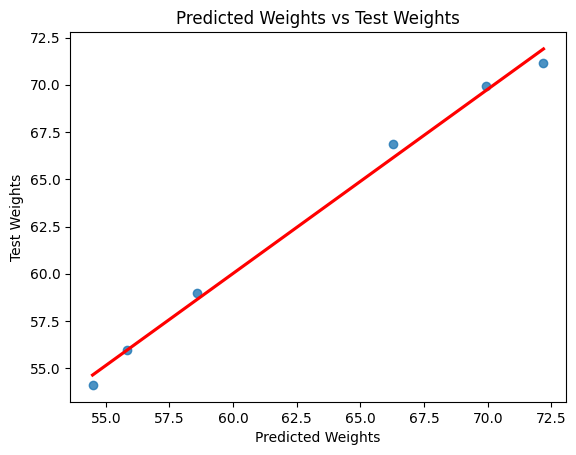

In [50]:
sns.regplot(x=y_test, y=predictions, ci=None, line_kws={"color": "red"})
plt.xlabel("Predicted Weights")
plt.ylabel("Test Weights")
plt.title("Predicted Weights vs Test Weights")

### __3.Now, implement linear regression without the use of any inbuilt function.__

#### So here to implement the linear regression model from scratch, we will be using the MSE cost function and also gradient descent algorithm to find the optimal values of the parameters of the linear hypothesis function to reduce the prediction error.

---


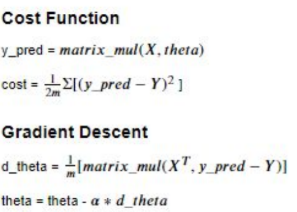

In [51]:
def custom_linear_regression_model(X,y, iterations, alpha):
    m, n = X.shape
    X_new = np.hstack((np.ones((X.shape[0], 1)), X))
    y_new = y.values.reshape(-1,1)
    theta = np.zeros((n + 1,1))
    for i in range(iterations):
        y_pred = np.dot(X_new, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - y_new))
        d_theta = (1/m)*np.dot(X_new.T, y_pred - y_new)
        theta = theta - alpha*d_theta
    return theta

In [52]:
trained_model_thetas = custom_linear_regression_model(X_train, y_train, 2000, 0.05)

In [53]:
trained_model_thetas

array([[ 1.59979242],
       [36.5792363 ]])

In [54]:
X_test_new = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_test_new = y_test.values.reshape(-1,1)

predictions_from_custom_model = np.zeros((X_test_new.shape[0], 1))

for index, item in enumerate(X_test_new):
    predictions_from_custom_model[index] = np.dot(item, trained_model_thetas)[0]

predictions_from_custom_model

array([[67.44241777],
       [57.2002316 ],
       [58.29760869],
       [66.71083304],
       [64.88187123],
       [60.12657051]])

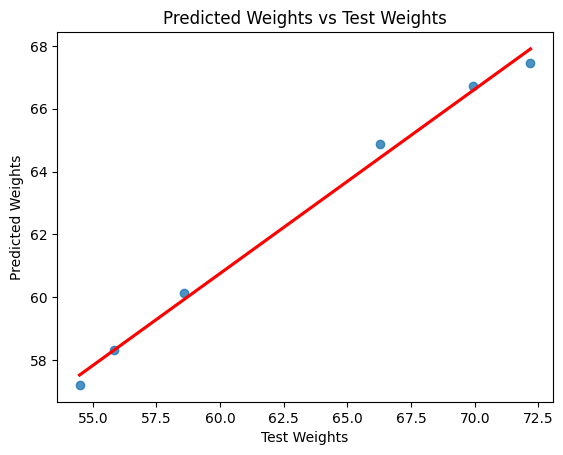

In [55]:
sns.regplot(x=y_test_new, y=predictions_from_custom_model, ci=None, line_kws={"color": "red"})
plt.xlabel("Test Weights")
plt.ylabel("Predicted Weights")
plt.title("Predicted Weights vs Test Weights")
%matplotlib inline

### __4.Compare the results of 1 and 3 graphically.__

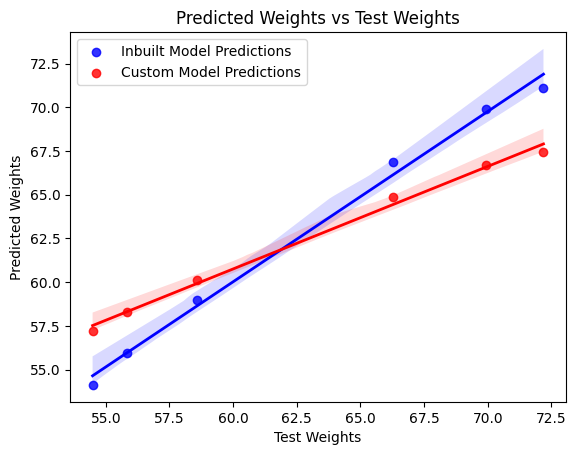

In [56]:
sns.regplot(x=y_test, y=predictions, label="Inbuilt Model Predictions", scatter_kws={'color': 'blue'}, line_kws={'color': 'blue', 'lw': 2})
sns.regplot(x=y_test_new, y=predictions_from_custom_model, label="Custom Model Predictions", scatter_kws={'color': 'red'}, line_kws={'color': 'red', 'lw': 2})
plt.xlabel("Test Weights")
plt.ylabel("Predicted Weights")
plt.title("Predicted Weights vs Test Weights")
%matplotlib inline
plt.legend()

# __2b: Logistic Regression Task__

### __1. Split the dataset into training set and test set in the ratio of 70:30 or 80:20__

In [57]:
log_regression_dataset = pd.read_csv('logistic_regression_dataset.csv')

In [58]:
log_regression_dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [59]:
log_regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [60]:
log_regression_dataset['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

<Axes: >

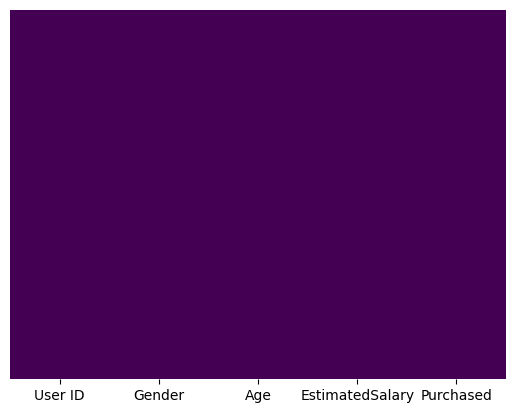

In [61]:
sns.heatmap(log_regression_dataset.isna(), yticklabels=False, cbar=False, cmap='viridis')

#### So from the above little exploratory data analysis of the dataset we can see that we have no missing values and mostly all are numerical values but the column Gender needs One Hot encoding since it is nominal in nature. Also the Column User ID is not useful and maybe dropped

In [62]:
Sex = pd.get_dummies(log_regression_dataset['Gender'], dtype=int, drop_first=True)

In [63]:
Sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [64]:
log_regression_dataset = pd.concat([log_regression_dataset,Sex], axis=1)

In [65]:
log_regression_dataset.drop(['User ID', 'Gender'], axis=1, inplace=True)

In [66]:
log_regression_dataset.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [67]:
log_X = log_regression_dataset[['Age', 'EstimatedSalary', 'Male']]
log_y = log_regression_dataset['Purchased']


log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(log_X, log_y, test_size=0.3, random_state=42)

### __2. Train the logistic regression classifier (using inbuilt function: LogisticRegression from sklearn)__

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
log_regression_model = LogisticRegression(max_iter=1000)

log_regression_model.fit(log_X_train, log_y_train)

LogisticRegression(max_iter=1000)

In [70]:
log_regression_model_predictions = log_regression_model.predict(log_X_test)

In [71]:
log_regression_model_predictions

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

### __3.Print the confusion matrix and accuracy__

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [73]:
print(confusion_matrix(log_y_test, log_regression_model_predictions))

[[71  2]
 [15 32]]


Text(0.5, 1.0, 'Confusion Matrix')

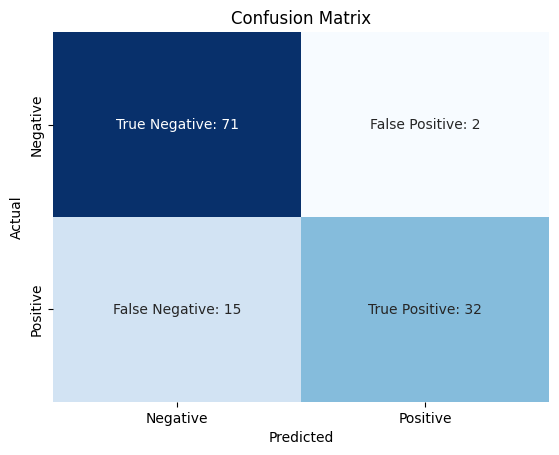

In [74]:
conf_matrix = confusion_matrix(log_y_test, log_regression_model_predictions)
tn, fp, fn, tp = conf_matrix.ravel()

conf_matrix_labels = [[f'True Negative: {tn}', f'False Positive: {fp}'],
                     [f'False Negative: {fn}', f'True Positive: {tp}']]

sns.heatmap(conf_matrix, annot=conf_matrix_labels, fmt='', cbar=False, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [75]:
acc = accuracy_score(log_y_test, log_regression_model_predictions)

print(f'Accuracy: {round(acc * 100, 2)} %')

Accuracy: 85.83 %


# __3: SVM__

### __1. Store the dataset in your google drive and in Colab file load the dataset from your drive__

In [76]:
bank_loan_dataset = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [77]:
bank_loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### __2. Check the shape and head of the dataset__

In [78]:
bank_loan_dataset.shape

(5000, 14)

In [79]:
bank_loan_dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### __3. Age, Experience, Income, CCAvg, Mortgage, Securities are the features and Credit Card is your Target Variable__

#### __i. Take any 3 features from the six features given above__

In [80]:
bank_loan_dataset_partial = bank_loan_dataset[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Securities Account', 'CreditCard']]

In [81]:
bank_loan_dataset_partial.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CreditCard
0,25,1,49,1.6,0,1,0
1,45,19,34,1.5,0,1,0
2,39,15,11,1.0,0,0,0
3,35,9,100,2.7,0,0,0
4,35,8,45,1.0,0,0,1


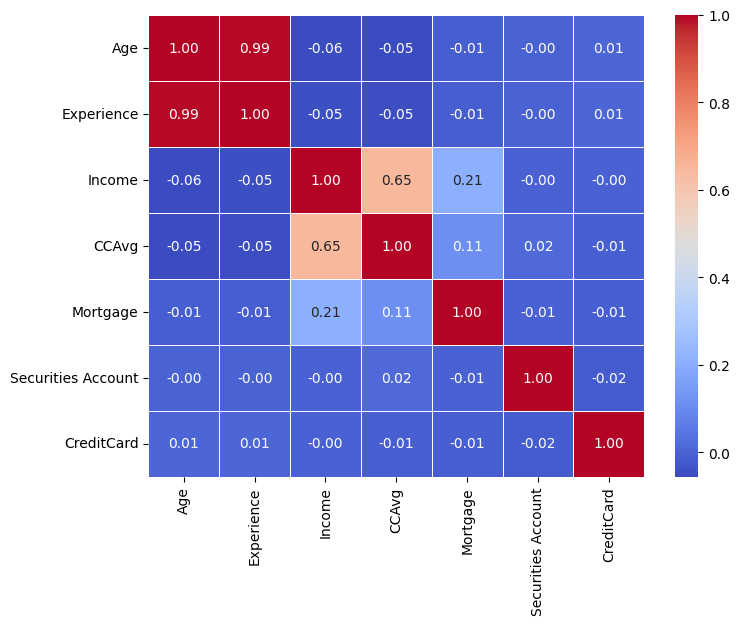

In [82]:
corr_matrix_bank_loan = bank_loan_dataset_partial.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_bank_loan, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
%matplotlib inline

#### From this correlation matrix between the features and target variable "Credit Card", We take Income, CCAvg, Mortgage as the 3 features since they are somewhat less not correlated to "Credit Card". Also If we look at the heatmap then we can see that Income has very high correlation with Mortgage and CCAvg as compared to the rest of the features. Also conversely it is true for Mortgae and CCAvg.

#### __ii. Store features and targets into a separate variable__

In [83]:
feature_variables = bank_loan_dataset[['Income', 'CCAvg', 'Mortgage']]

target_variable = bank_loan_dataset[['CreditCard']]

In [84]:
feature_variables.head()

,Income,CCAvg,Mortgage
0,49,1.6,0
1,34,1.5,0
2,11,1.0,0
3,100,2.7,0
4,45,1.0,0


In [85]:
target_variable.head()

,CreditCard
0,0
1,0
2,0
3,0
4,1


#### __iii. Look for missing values in the data, if any, and address them accordingly__

<Axes: >

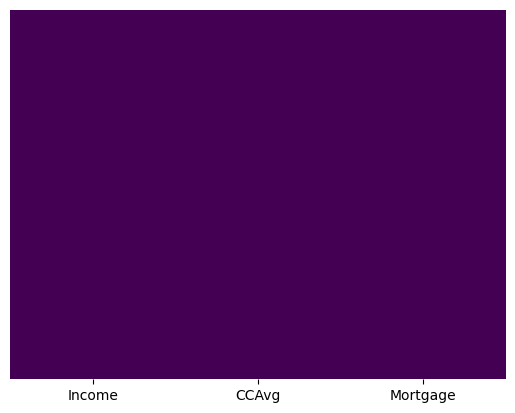

In [86]:
sns.heatmap(feature_variables.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [87]:
feature_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Income    5000 non-null   int64  
 1   CCAvg     5000 non-null   float64
 2   Mortgage  5000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 117.3 KB


In [88]:
target_variable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CreditCard  5000 non-null   int64
dtypes: int64(1)
memory usage: 39.2 KB


#### __iv. Plot a 3D scatter plot using Matplotlib__

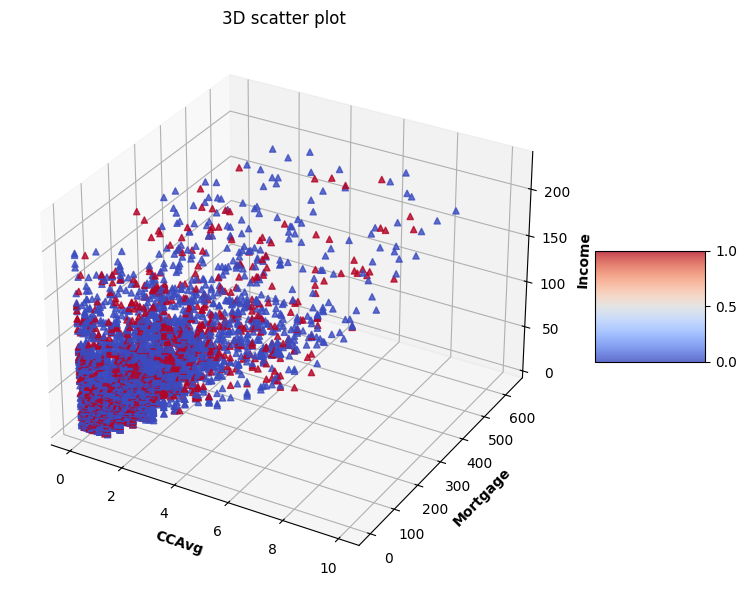

In [89]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
x = feature_variables['CCAvg']
y = feature_variables['Mortgage']
z = feature_variables['Income']


# Creating color map
my_cmap = plt.get_cmap('coolwarm')

# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = target_variable['CreditCard'].values,
                    cmap = my_cmap,
                    marker ='^')

plt.title("3D scatter plot")
ax.set_xlabel('CCAvg', fontweight ='bold')
ax.set_ylabel('Mortgage', fontweight ='bold')
ax.set_zlabel('Income', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 1)
plt.tight_layout()

### __4. Split the dataset into 80:20. (3 features and 1 target variable)__

In [90]:
X_train_SVC, X_test_SVC, y_train_SVC, y_test_SVC = train_test_split(feature_variables, target_variable, test_size=0.2, random_state=101)

In [91]:
X_train_SVC.shape

(4000, 3)

### __5. Train the model using scikit learn SVM API (LinearSVC) by setting the regularization parameter C as C = {0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000}__

#### __i. For each value of C Print the score on test data__
#### __ii. Make the prediction on test data__
#### __iii. Print confusion matrix and classification report__

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

In [93]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in C_values:
    print (f'\n===SCORE FOR C VALUE {c}===\n')
    lsvm = LinearSVC(C = c, max_iter=5000, dual=False, class_weight='balanced')
    lsvm.fit(X_train_SVC, y_train_SVC.values.ravel())
    y_pred = lsvm.predict(X_test_SVC)
    test_score = lsvm.score(X_test_SVC, y_test_SVC)
    clss_report = classification_report(y_test_SVC, y_pred)
    conf_matrix = confusion_matrix(y_test_SVC,y_pred)
    print(f"Score: {test_score:.3f}")
    print("Classification Report:")
    print(clss_report)
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"\n=============================\n")


===SCORE FOR C VALUE 0.0001===

Score: 0.564
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       735
           1       0.22      0.25      0.23       265

    accuracy                           0.56      1000
   macro avg       0.47      0.46      0.46      1000
weighted avg       0.58      0.56      0.57      1000

Confusion Matrix:
[[498 237]
 [199  66]]



===SCORE FOR C VALUE 0.001===

Score: 0.452
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.44      0.54       735
           1       0.24      0.49      0.32       265

    accuracy                           0.45      1000
   macro avg       0.47      0.46      0.43      1000
weighted avg       0.58      0.45      0.48      1000

Confusion Matrix:
[[322 413]
 [135 130]]



===SCORE FOR C VALUE 0.01===

Score: 0.425
Classification Report:
              precision    recall  f1-score   support

 

### __6. Use gridSearchCV a cross-validation technique to find the best regularization parameters (i.e.: the best value of C).__

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
lsvm = LinearSVC(max_iter=5000, dual=False,class_weight='balanced')
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search_cv = GridSearchCV(lsvm, param_grid,verbose=3)

In [96]:
grid_search_cv.fit(X_train_SVC, y_train_SVC.values.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..........................C=0.0001;, score=0.600 total time=   0.0s
[CV 2/5] END ..........................C=0.0001;, score=0.564 total time=   0.0s
[CV 3/5] END ..........................C=0.0001;, score=0.616 total time=   0.0s
[CV 4/5] END ..........................C=0.0001;, score=0.565 total time=   0.0s
[CV 5/5] END ..........................C=0.0001;, score=0.588 total time=   0.0s
[CV 1/5] END ...........................C=0.001;, score=0.516 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.490 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.485 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.499 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.487 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.495 total time=   0.0s
[CV 2/5] END ............................C=0.01;,

GridSearchCV(estimator=LinearSVC(class_weight='balanced', dual=False,
                                 max_iter=5000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             verbose=3)

In [97]:
print("Best C:", grid_search_cv.best_params_)
print("Best Score:", grid_search_cv.best_score_)

Best C: {'C': 0.0001}
Best Score: 0.5864999999999999



Classification Report After GridSearch:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70       735
           1       0.22      0.25      0.23       265

    accuracy                           0.56      1000
   macro avg       0.47      0.46      0.46      1000
weighted avg       0.58      0.56      0.57      1000




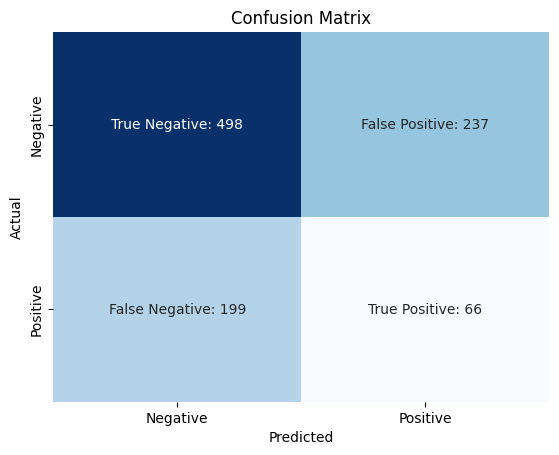

In [98]:
grid_predictions = grid_search_cv.predict(X_test_SVC)
grid_search_cm = confusion_matrix(y_test_SVC, grid_predictions)
grid_search_cr = classification_report(y_test_SVC,grid_predictions)

tn, fp, fn, tp = grid_search_cm.ravel()

conf_matrix_labels = [[f'True Negative: {tn}', f'False Positive: {fp}'],
                     [f'False Negative: {fn}', f'True Positive: {tp}']]

sns.heatmap(grid_search_cm, annot=conf_matrix_labels, fmt='', cbar=False, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


print(f"\nClassification Report After GridSearch:\n {grid_search_cr}\n")

# __4: Decision Tree and Random Forest__



#### __Load the IRIS dataset. The dataset consists of 150 samples of iris flowers, each belonging to one of three species (setosa, versicolor, or virginica). Each sample includes four features: sepal length, sepal width, petal length, and petal width.__

### __1. Visualize the distribution of each feature and the class distribution.__

In [99]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [100]:
iris_df.drop('Id', inplace=True, axis = 1)

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [101]:
iris_df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

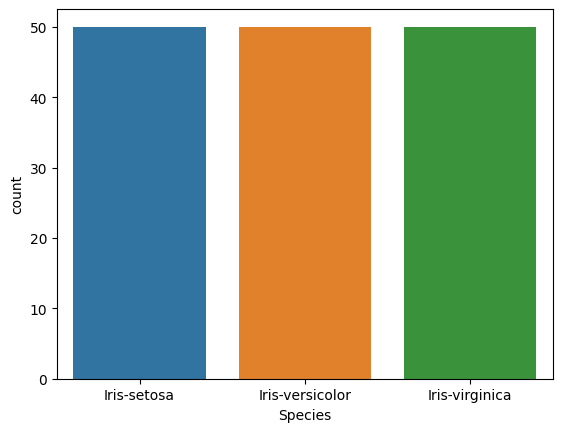

In [102]:
sns.countplot(x='Species', data=iris_df,hue='Species')

#### So from here we can see that We have four features namely __'SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm'__ and target variable __'Species'__ So we can visualise their relationship use kde plots

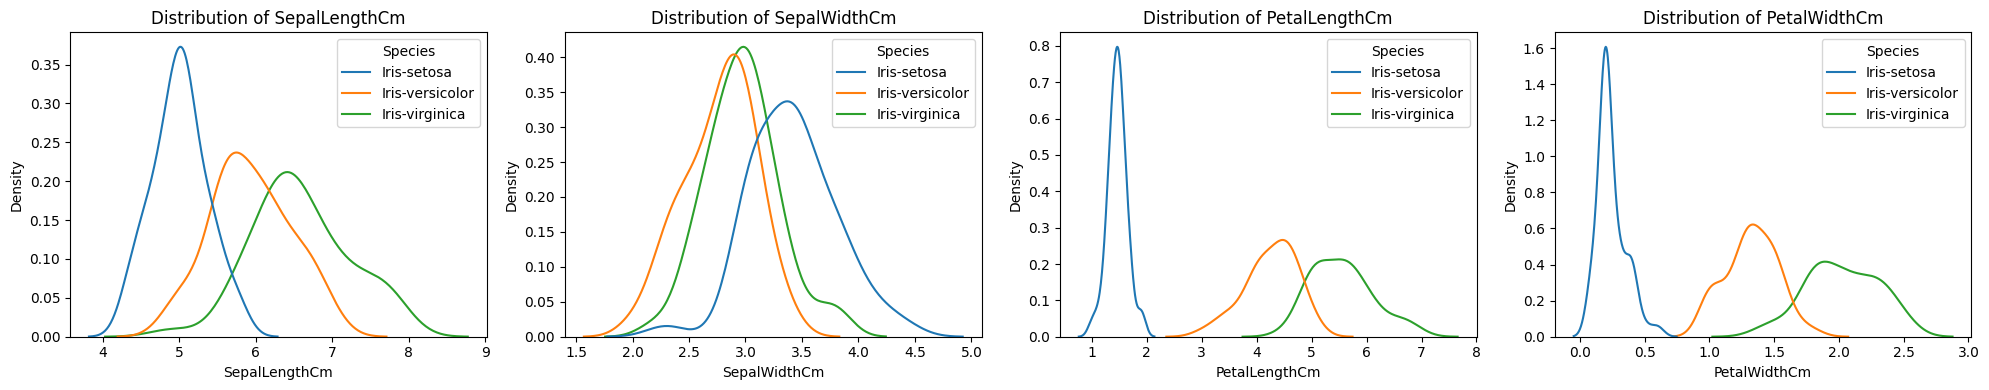

In [103]:
feature_columns = iris_df.columns[:-1]

num_plots = len(feature_columns)

# Creating subplots in a single row
fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 4))

#Enumerating over the features and doing their kernel density estimation with the target(Species)
for i, item in enumerate(feature_columns):
  sns.kdeplot(data=iris_df, x=item, hue='Species', ax=axes[i])
  axes[i].set_title(f'Distribution of {item}')

plt.tight_layout()
plt.show()

### __2. Encode the categorical target variable (species) into numerical values.__


In [104]:
from sklearn.preprocessing import LabelEncoder


In [105]:
labelEncoder = LabelEncoder()


iris_df['Species'] = labelEncoder.fit_transform(iris_df['Species'])
iris_df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [106]:
iris_df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

### __3. Split the dataset into training and testing sets (use an appropriate ratio).__

#### Here we shall be splitting the dataset in a __80:20__ split (train: test).

In [107]:
iris_X = iris_df[feature_columns]
iris_y = iris_df['Species']

iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=101)


### __4. Decision Tree Model__

#### __i. Build a decision tree classifier using the training set.__

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
decisionTree = DecisionTreeClassifier(max_depth=2)

decisionTree.fit(iris_X_train, iris_y_train)

DecisionTreeClassifier(max_depth=2)

#### __ii. Visualize the resulting decision tree.__

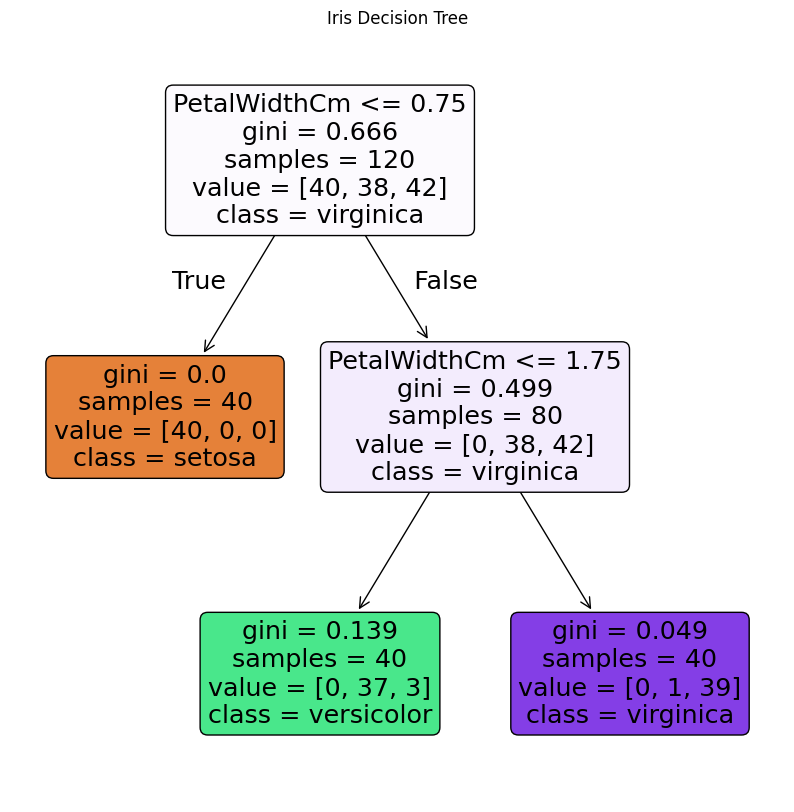

In [110]:
from IPython.display import Image
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 10))
plot_tree(decisionTree,feature_names=feature_columns, class_names=['setosa', 'versicolor', 'virginica'], filled=True, rounded=True)
plt.title("Iris Decision Tree")
plt.show()

#### __iii. Make predictions on the testing set and evaluate the model's performance using appropriate metrics (e.g., accuracy, confusion matrix).__

In [111]:
iris_predictions = decisionTree.predict(iris_X_test)

In [112]:
iris_cr = classification_report(iris_y_test, iris_predictions)
iris_cm = confusion_matrix(iris_y_test, iris_predictions)

print("Classification Report:")
print(iris_cr)
print("Confusion Matrix:")
print(iris_cm)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      1.00      0.92        12
           2       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30

Confusion Matrix:
[[10  0  0]
 [ 0 12  0]
 [ 0  2  6]]


Text(0.5, 1.0, 'Confusion Matrix Heatmap')

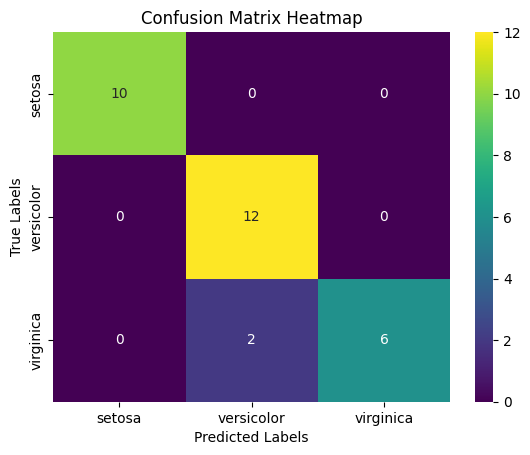

In [113]:
cm_df = pd.DataFrame(iris_cm, columns=['setosa', 'versicolor', 'virginica'], index=['setosa', 'versicolor', 'virginica'])


sns.heatmap(cm_df, annot=True, cmap='viridis')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

### __5. Random Forest Model__

#### __i. Build a random forest classifier using the training set__
#### __ii. Tune the hyperparameters (e.g., number of trees, maximum depth) if necessary__
#### __iii. Make predictions on the testing set and evaluate the model's performance using appropriate metrics and compare it with the decision tree model__

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=101)


In [116]:
rfc.fit(iris_X_train, iris_y_train)

RandomForestClassifier(max_depth=2, n_estimators=500, random_state=101)

In [117]:
rfc_predictions = rfc.predict(iris_X_test)

In [118]:
iris_rfc_cr = classification_report(iris_y_test, rfc_predictions)
iris_rfc_cm = confusion_matrix(iris_y_test, rfc_predictions)

print("Classification Report:")
print(iris_rfc_cr)
print("Confusion Matrix:")
print(iris_rfc_cm)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]


Text(0.5, 1.0, 'Confusion Matrix Heatmap')

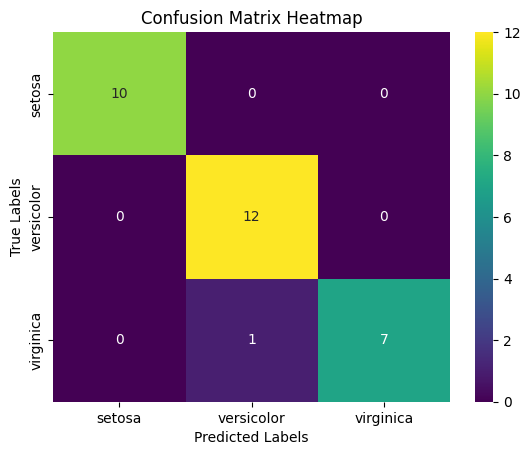

In [119]:
rfc_cm_df = pd.DataFrame(iris_rfc_cm, columns=['setosa', 'versicolor', 'virginica'], index=['setosa', 'versicolor', 'virginica'])


sns.heatmap(rfc_cm_df, annot=True, cmap='viridis')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

### So we can see the after using Random Forest Classifer. We get little better result than the Decision Tree Classifier as in a Single Decision TreeClassifier with max_depth 2 we got 2 virginicas predicted falsely as versicolor whereas in the Random Forect Classifier we got only 1 virginica classified falsely as versicolor. The rest remains the same.


---

